In [53]:
"""
baselines.py: contains all your network structure definition
including layers definition and forward pass function definition
"""
# PyTorch and neural network imports
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as utils
import numpy as np
import math
import random
random.seed(0)
torch.manual_seed(0)
np.random.seed(0)

# NOTE: do not change these
mlp_output_size = 10
mlp_hidden_size = 10

# TODO - modify the architecture of AEFullyConnected
class AEFullyConnected(nn.Module):
    """
        Fully Connected AE
    """
    def __init__(self):
        # TODO modify
        super(AEFullyConnected, self).__init__()
        self.enc=nn.Sequential(
        nn.Linear(784, 312),
            nn.ReLU(),
            nn.Linear(312, 160),
            nn.ReLU(),
            nn.Linear(160, 50),
            nn.ReLU(),
            nn.Linear(50, 3))
        self.dec=nn.Sequential(
        nn.Linear(3, 50),
            nn.ReLU(),
            nn.Linear(50, 160),
            nn.ReLU(),
            nn.Linear(160, 312),
            nn.ReLU(),
            nn.Linear(312, 784),
            nn.Tanh())

    def get_enc_out_dim(self):
        # TODO put output size of encoder here
        enc_out_dim = 3

        return enc_out_dim

    def forward(self, x):
        # TODO modify corresponding to changes in __init__
        x = self.enc(x)
        x = self.dec(x)
        return x

# NOTE: do not modify this class
class BaselineMLP(nn.Module):
    def __init__(self, inp_dim=28*28):
        """
        A multilayer perceptron model
        Consists of one hidden layer and 1 output layer (all fully connected)
        """
        super(BaselineMLP, self).__init__()
        self.fc1 = nn.Linear(inp_dim, mlp_hidden_size)
        self.fc2 = nn.Linear(mlp_hidden_size, mlp_output_size)

    def forward(self, X):
        """
        Pass the batch of images through each layer of the network, applying
        logistic activation function after hidden layer.
        """
        out = self.fc1(X)
        out = torch.sigmoid(out)
        out = self.fc2(out)
        return out

# TODO - design AECNN
class AECNN(nn.Module):
    """
        Convolutional AE
    """
    def __init__(self):
        super(AECNN, self).__init__()

        self.enc=nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1), # 3
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 4, 3, padding=1),# 3
            nn.ReLU(True),
            nn.MaxPool2d(2, 2)
        )
        self.dec=nn.Sequential(
            nn.ConvTranspose2d(4, 16, 2, stride=2), #2
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 2, stride=2),  #2
            nn.Sigmoid()
        )
        
    def get_enc_out_dim(self):
        # TODO put number channels of encoder output here
        enc_out_channels = 4
        # TODO put spatial dimensions (i.e. height and width) of encoder output here
        enc_out_dim = 7 #7
        return enc_out_channels, enc_out_dim

    def forward(self, X):

        ### TODO
        # 1. Call the encoder
        # 2. Reshape/Flatten the ouptut of encoder
        # 3. Call the decoder
        # 4. Reshape the output of decoder to that of the original image
        ###
        X = self.enc(X)
        X = self.dec(X)
        return X
    
def conv_out_spatdim_calculate(in_size, kernel_size, stride=1, padding=0):
    return math.floor((in_size + (2 * padding) - kernel_size)/stride) + 1
    
def conv_out_dim_calculate(in_size, out_channels, kernel_size, stride=1, padding=0):
    out_width = conv_out_spatdim_calculate(in_size, kernel_size, stride, padding)
    return (out_width**2) * out_channels

conv_out_channels=10
conv_kernel_size=5
conv_stride=1
conv_padding=2

# NOTE: do not modify this class
class BaselineCNN(nn.Module):
    def __init__(self, in_channels=1, in_dim=28):
        """
        A basic convolutional neural network model for baseline comparison.
        Consists of one Conv2d layer, followed by 1 fully-connected (FC) layer:
        conv1 -> fc1 (outputs)
        """
        super(BaselineCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, conv_out_channels, \
                kernel_size=conv_kernel_size, stride=conv_stride, \
                padding=conv_padding)
        self.conv_out_dim = conv_out_dim_calculate(in_dim, conv_out_channels, \
                conv_kernel_size, conv_stride, conv_padding)

        self.fc1 = nn.Linear(self.conv_out_dim, 10)

    def forward(self, X):
        """
        Pass the batch of images through each layer of the network, applying
        non-linearities after each layer.

        Note that this function *needs* to be called "forward" for PyTorch to
        automagically perform the forward pass.

        Parameters: X --- an input batch of images
        Returns:    out --- the output of the network
        """
        out = self.conv1(X)
        out = out.view(-1, self.conv_out_dim)
        out = torch.tanh(out)
        out = self.fc1(out)
        return out

    """
    Count the number of flattened features to be passed to fully connected layers
    Parameters: inputs --- 4-dimensional [batch x num_channels x conv width x conv height]
                            output from the last conv layer
    Return: num_features --- total number of flattened features for the last layer
    """
    def num_fc_features(self, inputs):

        # Get the dimensions of the layers excluding the batch number
        size = inputs.size()[1:]
        # Track the number of features
        num_features = 1

        for s in size:
            num_features *= s

        return num_features


Training CNN with both supervised and unsupervised data...
  Training autoencoder...
    Epoch 1/50...
    Epoch 2/50...
    Epoch 3/50...
    Epoch 4/50...
    Epoch 5/50...
    Epoch 6/50...
    Epoch 7/50...
    Epoch 8/50...
    Epoch 9/50...
    Epoch 10/50...
    Epoch 11/50...
    Epoch 12/50...
    Epoch 13/50...
    Epoch 14/50...
    Epoch 15/50...
    Epoch 16/50...
    Epoch 17/50...
    Epoch 18/50...
    Epoch 19/50...
    Epoch 20/50...
    Epoch 21/50...
    Epoch 22/50...
    Epoch 23/50...
    Epoch 24/50...
    Epoch 25/50...
    Epoch 26/50...
    Epoch 27/50...
    Epoch 28/50...
    Epoch 29/50...
    Epoch 30/50...
    Epoch 31/50...
    Epoch 32/50...
    Epoch 33/50...
    Epoch 34/50...
    Epoch 35/50...
    Epoch 36/50...
    Epoch 37/50...
    Epoch 38/50...
    Epoch 39/50...
    Epoch 40/50...
    Epoch 41/50...
    Epoch 42/50...
    Epoch 43/50...
    Epoch 44/50...
    Epoch 45/50...
    Epoch 46/50...
    Epoch 47/50...
    Epoch 48/50...
    Epoch 49

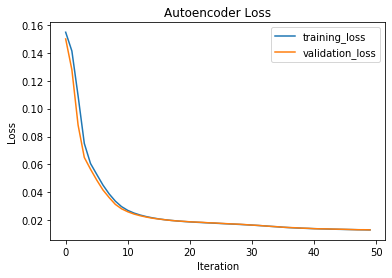

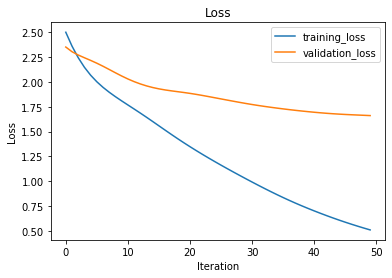

In [54]:
import torch
import numpy as np
from matplotlib import pyplot as plt
#from nn_models import *
from torch.utils.data.sampler import SubsetRandomSampler
import time

use_cpu=True # set to False if you have a GPU
device= torch.device("cpu") if use_cpu else torch.device("cuda:0")

# ensure reproducible results
torch.manual_seed(0)
np.random.seed(0)

"""
TODO: You may want to change these parameters
"""
num_iter = 50
ae_num_iter = 50
ae_learning_rate = 0.0009
learning_rate = 0.0005
batch_size = 64

"""
Read data from the specified training, validation and test data files.
We are using the whole image, not creating other features now
"""
def read_data(trainFile, valFile, testFile, use_mlp=False):
    # trian, validation, and test data loader
    data_loaders = []

    # read training, test, and validation data
    for i, file in enumerate([trainFile, valFile, testFile]):
        # read data
        data = np.loadtxt(file)
        # digit images
        imgs = torch.tensor(data[:,:-1]).float()
        # divide each image by its maximum pixel value for numerical stability
        imgs = imgs / torch.max(imgs,dim=1).values[:,None]

        # labels for each image
        labels = torch.tensor(data[:,-1]).long()

        # if using CNN model, reshape each image:
        # [batch x num_channel x image width x image height]
        if not use_mlp:
            imgs = imgs.view(-1,1,28,28)

        if i==0 or i==1: # split the train and validation data into supervised and unsupervised
            # 1% labeled (supervised data), 99% unlabeled (unsupervised)
            M=len(imgs)
            rand_idxs=np.random.permutation(M)
            unsup_size=int(0.99*M) #sup_size=M-unsup_size
            unsup_imgs=imgs[rand_idxs[:unsup_size]] # unsup data has no labels
            sup_imgs=imgs[rand_idxs[unsup_size:]]
            sup_labels=labels[rand_idxs[unsup_size:]]
            
            # create unsupervised dataset and dataloader
            unsup_dataset = utils.TensorDataset(unsup_imgs, unsup_imgs)
            unsup_dataloader = utils.DataLoader(unsup_dataset, batch_size=batch_size, shuffle=True)
            data_loaders.append(unsup_dataloader)
            
            # create supervised dataset and dataloader
            sup_dataset = utils.TensorDataset(sup_imgs, sup_labels)
            sup_dataloader = utils.DataLoader(sup_dataset, batch_size=batch_size, shuffle=True)
            data_loaders.append(sup_dataloader)
        
        # test data
        else:
            # create dataset and dataloader, a container to efficiently load data in batches
            dataset = utils.TensorDataset(imgs,labels)
            dataloader = utils.DataLoader(dataset, batch_size=batch_size, shuffle=True)
            data_loaders.append(dataloader)
    
    return (data_loaders[0], data_loaders[1], # unsupervised and supervised train data
            data_loaders[2], data_loaders[3], # unsupervised and supervised valid data
            data_loaders[4] # test
           )

def train_generic(cnn, ae, train_loader, val_loader, this_learning_rate, this_num_iter, ae_net=None):
    avg_train_loss = []
    avg_val_loss = []
    best_val_score = float('inf')
    net_type = "cnn" if cnn else "mlp"
    ae_type = "ae" if ae else "nn"
    cp_filename = "checkpoint_{}_{}.pt".format(ae_type, net_type)
    if ae:
        if cnn:
            net_class_init = AECNN
        else:
            net_class_init = AEFullyConnected
    else:
        if cnn:
            net_class_init = BaselineCNN
        else:
            net_class_init = BaselineMLP

    if ae_net != None:
        if cnn:
            enc_out_channels, enc_out_dim = ae_net.get_enc_out_dim()
            net_class = lambda: net_class_init(enc_out_channels, enc_out_dim)
        else:
            net_class = lambda: net_class_init(ae_net.get_enc_out_dim())
    else:
        net_class = net_class_init

    net = net_class()

    net=net.to(device)
    
    if ae:
        criterion = nn.MSELoss()  
    else:
        criterion = nn.CrossEntropyLoss()  
    optimizer = optim.Adam(net.parameters(), lr=this_learning_rate)
    i = 0
    while i < this_num_iter:
        print("    Epoch {}/{}...".format(i + 1, this_num_iter))
        train_loss = []
        val_loss = []
        for _, (X,y) in enumerate(train_loader):
            optimizer.zero_grad()
            X,y=X.to(device), y.to(device)
            if ae_net != None:
                X = ae_net.enc(X)
            outputs = net(X)
            loss = criterion(outputs,y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        avg_train_loss.append(np.average(train_loss))
        with torch.no_grad():
            for _, (X,y) in enumerate(val_loader):
                X,y=X.to(device), y.to(device)
                if ae_net != None:
                    X = ae_net.enc(X)
                output = net(X)
                loss = criterion(output, y)
                val_loss.append(loss.item())
            avg_val = np.average(val_loss)
            avg_val_loss.append(avg_val)
            if avg_val < best_val_score:
                best_val_score = avg_val
                torch.save(net.state_dict(),cp_filename)
        i += 1
    net = net_class()
    net=net.to(device)
    net.load_state_dict(torch.load(cp_filename))
    return net, avg_train_loss, avg_val_loss

"""
Train your Multilayer Perceptron (MLP) or Convolutional Neural Network (CNN) in
a semisupervised fashion - using both the labeled and unlabeled data
    For unsupervised data - train an Autoencoder (AE)
    For supervised data - Use the output of the encoder of the AE as input for the supervised model
    - parameters:   cnn --- are we training on a CNN?
                    unsup_train_loader --- the train loader for unsupervised data
                    sup_train_loader --- the train loader for supervised data
                    unsup_valid_loader --- the validation loader for unsupervised data
                    sup_valid_loader --- the validation loader for supervised data
    - return:       net --- the trained MLP network
                    ae --- the trained Autoencoder
                    ae_avg_train_loss - AE train losses (one entry for each epoch)
                    ae_avg_val_loss - AE validation losses (one entry for each epoch)
                    avg_train_loss - MLP train losses (one entry for each epoch)
                    avg_val_loss - MLP validation losses (one entry for each epoch)

"""
def train_semisup_generic(cnn, unsup_train_loader, sup_train_loader, unsup_val_loader, sup_val_loader):
    print("  Training autoencoder...")
    ae, ae_avg_train_loss, ae_avg_val_loss = train_generic(cnn, True, \
                    unsup_train_loader, unsup_val_loader,
                    ae_learning_rate, ae_num_iter)
    print("  Training neural network...")
    net, avg_train_loss, avg_val_loss = train_generic(cnn, False, \
                    sup_train_loader, sup_val_loader,
                    learning_rate, num_iter, ae)
    
    return net, ae, ae_avg_train_loss, ae_avg_val_loss, avg_train_loss, avg_val_loss

"""
Evaluate the model, using unseen data features "X" and
corresponding labels "y".
Parameters: loader --- the validation loader
            net --- the trained network
Return: the accuracy on validation set
"""
def evaluate(loader, net, ae=None):
    total = 0
    correct = 0
    # use model to get predictions
    for X,y in loader:
        X,y=X.to(device), y.to(device)
        if ae != None:
            X=ae.enc(X)
        outputs = net(X)
        predictions = torch.argmax(outputs.data, 1)
        
        # total number of items in dataset
        total += y.shape[0]

        # number of correctly labeled items in dataset
        correct += torch.sum(predictions == y)

    # return fraction of correctly labeled items in dataset
    return float(correct) / float(total)

def create_submission(predictions, fname="submission.csv"):
    """
            `predictions` - numpy array of dimension (n_samples,)
    """
    with open(fname, 'w') as f:
        f.write("ImageId,Class")
        for idx,yhat in enumerate(predictions):
            f.write("\n{},{}".format(idx,yhat))

def plot_losses(t_loss, v_loss, title):
    # AE train/validation loss
    plt.plot(t_loss)
    plt.plot(v_loss)
    plt.legend(["training_loss","validation_loss"])
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title(title)
    plt.show()

if __name__ == "__main__":

    # TODO: you'll need to change `use_mlp` to False if you want to test your CNN model
    use_mlp = False
    sup_only = False # to test performance of model when trained only on the supervised data, discarding the unsupervised and should be False for this HW

    # TODO - set data directory
    data_dir="data/" # set to "./" if data is in the same dir as this file
    unsup_train_loader, sup_train_loader, unsup_val_loader, sup_val_loader, test_loader = read_data(data_dir+'hw0train.txt',data_dir+'hw0validate.txt', data_dir+'hw0test.txt', use_mlp)
    
    msg = "Training {} with {}...".format("MLP" if use_mlp else "CNN", \
            "supervised data only" if sup_only else \
            "both supervised and unsupervised data")
    print(msg)

    start = time.time()
    if sup_only:
        net, t_losses, v_losses = train_generic(not use_mlp, False, \
                sup_train_loader, sup_val_loader,
                learning_rate, num_iter)
    else:
        net, ae, ae_t_losses, ae_v_losses, t_losses, v_losses \
            = train_semisup_generic(not use_mlp, unsup_train_loader, sup_train_loader, \
            unsup_val_loader, sup_val_loader)

    print(f"Training duration: {(time.time() - start)/60:.3f} minutes")

    # evaluate model on test data
    if sup_only:
        print(f"Test accuracy (using only supervised data): {evaluate(test_loader, net):.3f}")
    else:
        print(f"Test accuracy (using both supervised and unsupervised data): {evaluate(test_loader, net, ae):.3f}")


    # plot losses
    if not sup_only:
        plot_losses(ae_t_losses, ae_v_losses, "Autoencoder Loss")
    
    # MLP/CNN train/validation loss
    plot_losses(t_losses, v_losses, "Loss")
